In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import re
import seaborn as sns

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [32]:
titanic = pd.read_csv("./res/titanic/train.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [33]:
numMissing = titanic.shape[0] - titanic.count()
numMissing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 시각화

### Pclass - Survived

In [145]:
titanic.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [146]:
pclass = titanic.groupby("Pclass")["Survived"].value_counts().unstack()
pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [158]:
# margins=True: All 출력
pd.crosstab(titanic["Pclass"], 
            titanic["Survived"], 
            margins=True).style.background_gradient(cmap="BuGn_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


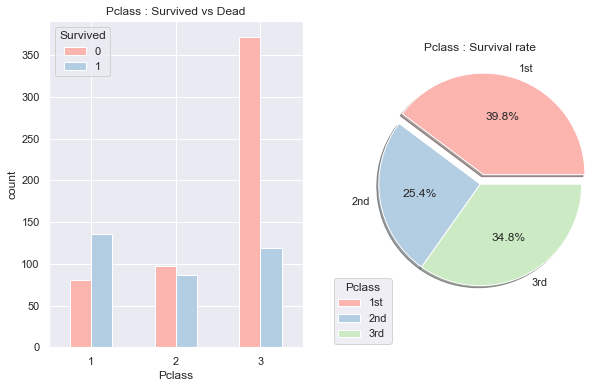

In [162]:
sns.set(palette="Pastel1")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Pclass에 따른 생존자 수 그래프
axes[0].set(xlabel="Pclass", ylabel="count", title="Pclass : Survived vs Dead")
pclass.plot.bar(rot=0, ax=axes[0])

# 전체 생존자 중 Pclass에따른 생존율
axes[1].set(ylabel="", title="Pclass : Survival rate")
axes[1].axis("off")

labels = ["1st", "2nd", "3rd"]
pclass[1].plot.pie(labels=labels, explode=[0.1, 0, 0], shadow=True, autopct="%1.1f%%", subplots=True)
# bbox_to_anchor=(x, y, width, height)
axes[1].legend(title="Pclass", loc="center left", bbox_to_anchor=(-0.1, 0))

In [151]:
# 각 class별 생존율
titanic[["Pclass", "Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


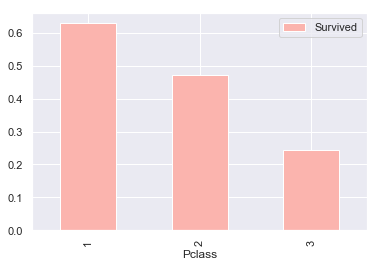

In [152]:
titanic[["Pclass", "Survived"]].groupby("Pclass").mean().plot.bar()

### Sex - Survived

In [166]:
titanic.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [168]:
# 성별에 따른 생존율
sex = titanic[["Sex", "Survived"]].groupby(["Sex"]).mean()
sex

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Sex: Survived vs Dead')

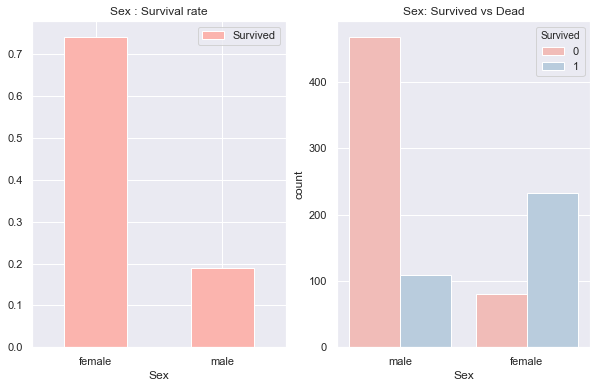

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].set_title("Sex : Survival rate")
sex.plot.bar(ax=axes[0], rot=0)

sns.countplot(data=titanic, x="Sex", hue="Survived", ax=axes[1])
axes[1].set_title("Sex: Survived vs Dead")

### Cabin - Survived

In [175]:
numMissing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [180]:
cabinDf = titanic[titanic["Cabin"].notnull()][["Cabin", "Survived"]]
cabinDf.head(10)

,Cabin,Survived
1,C85,1
3,C123,1
6,E46,0
10,G6,1
11,C103,1
21,D56,1
23,A6,1
27,C23 C25 C27,0
31,B78,1
52,D33,1


In [183]:
cabinDf.groupby("Cabin")["Survived"].value_counts()

Cabin  Survived
A10    0           1
A14    0           1
A16    1           1
A19    0           1
A20    1           1
A23    1           1
A24    0           1
A26    1           1
A31    1           1
A32    0           1
A34    1           1
A36    0           1
A5     0           1
A6     1           1
A7     0           1
B101   1           1
B102   0           1
B18    1           2
B19    0           1
B20    1           2
B22    0           1
       1           1
B28    1           2
B3     1           1
B30    0           1
B35    1           2
B37    0           1
B38    0           1
B39    1           1
B4     1           1
                  ..
E25    1           2
E31    0           1
E33    1           2
E34    1           1
E36    1           1
E38    0           1
E40    1           1
E44    0           1
       1           1
E46    0           1
E49    1           1
E50    1           1
E58    0           1
E63    0           1
E67    0           1
       1          

### Embarked - Survived

In [187]:
embarked = titanic[["Embarked", "Survived"]].groupby("Embarked").mean()
embarked

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


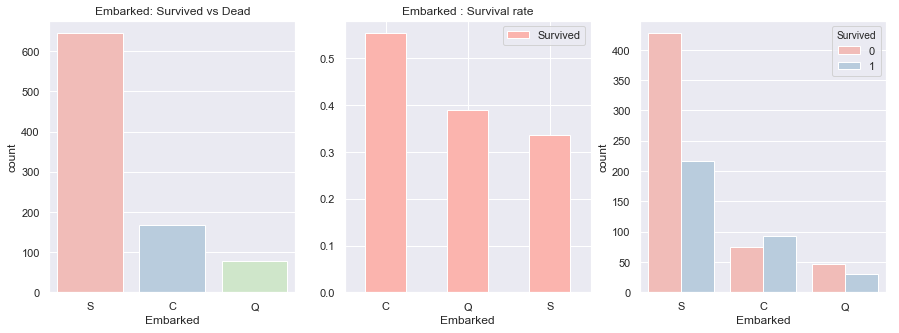

In [205]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title("Embarked passengers")
sns.countplot("Embarked", data=titanic, ax=axes[0])

axes[1].set_title("Embarked : Survival rate")
embarked.plot.bar(rot=0, ax=axes[1])

axes[0].set_title("Embarked: Survived vs Dead")
sns.countplot("Embarked", data=titanic, hue="Survived", ax=axes[2])

### Age(bins) - Survived
* 나이구간 <br>
0  :  0 ~ 20 <br>
1 : 20 ~ 40 <br>
2 : 40 ~ 60 <br>
3 : 60 ~ 80 <br>
4 : 80 ~

In [206]:
titanic["Age"].isna().value_counts() 

False    714
True     177
Name: Age, dtype: int64

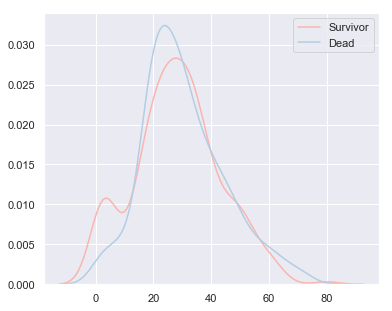

In [218]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
sns.kdeplot(titanic[titanic['Survived'] == 1]["Age"], ax=axes)
sns.kdeplot(titanic[titanic['Survived'] == 0]["Age"], ax=axes)
plt.legend(["Survivor", "Dead"])

Text(0.5, 0, 'Range of Age')

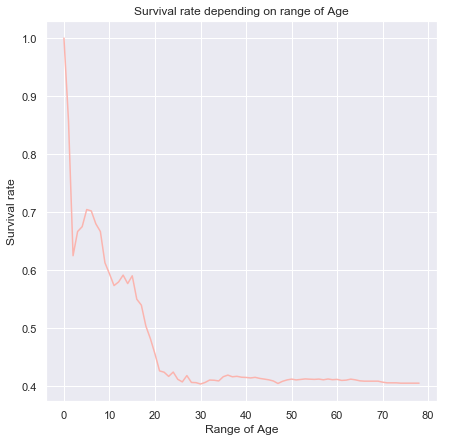

In [222]:
survivalRatio = []
for age in range(1, 80):
    survivalRatio.append(titanic[titanic["Age"] < age]["Survived"].sum() / len(titanic[titanic["Age"] < age]["Survived"]))
    
plt.figure(figsize=(7, 7))
plt.plot(survivalRatio)
plt.title("Survival rate depending on range of Age", y=1.0)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age")


In [259]:
titanic["Age"].max()

80.0

In [211]:
bins = np.linspace(titanic["Age"].min(), titanic["Age"].max() , 9 ,dtype = np.uint32)
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80], dtype=uint32)

In [212]:
np.digitize( titanic["Age"], bins)

array([3, 4, 3, 4, 4, 9, 6, 1, 3, 2, 1, 6, 3, 4, 2, 6, 1, 9, 4, 9, 4, 4,
       2, 3, 1, 4, 9, 2, 9, 9, 5, 9, 9, 7, 3, 5, 9, 3, 2, 2, 5, 3, 9, 1,
       2, 9, 9, 9, 9, 2, 1, 3, 5, 3, 7, 9, 3, 3, 1, 2, 3, 4, 5, 1, 9, 9,
       3, 2, 2, 3, 4, 2, 3, 3, 4, 3, 9, 9, 1, 4, 3, 3, 9, 3, 2, 4, 2, 9,
       3, 3, 3, 3, 5, 3, 6, 9, 8, 3, 4, 4, 3, 9, 3, 4, 4, 3, 3, 9, 4, 9,
       5, 2, 3, 3, 2, 3, 8, 3, 3, 1, 3, 9, 4, 4, 6, 2, 9, 3, 9, 5, 4, 3,
       5, 3, 3, 3, 2, 4, 2, 3, 9, 3, 3, 2, 2, 2, 3, 1, 4, 5, 6, 3, 6, 5,
       9, 6, 2, 4, 9, 9, 5, 5, 3, 2, 1, 1, 9, 5, 9, 3, 7, 1, 1, 3, 6, 2,
       9, 6, 4, 4, 9, 9, 1, 1, 1, 9, 9, 5, 5, 4, 4, 2, 2, 1, 5, 6, 9, 5,
       9, 3, 3, 9, 4, 5, 2, 1, 4, 3, 2, 5, 3, 4, 3, 4, 9, 4, 3, 5, 4, 4,
       2, 3, 6, 9, 4, 3, 2, 3, 2, 9, 4, 3, 6, 1, 3, 9, 5, 1, 2, 4, 9, 9,
       3, 3, 4, 5, 3, 3, 4, 6, 9, 3, 7, 4, 5, 3, 9, 4, 4, 6, 9, 1, 6, 5,
       9, 4, 2, 3, 6, 4, 9, 3, 5, 4, 9, 7, 5, 9, 1, 4, 7, 3, 2, 2, 9, 4,
       4, 3, 5, 3, 3, 2, 4, 3, 3, 9, 3, 1, 9, 6, 9,

In [215]:
titanic["AgeGroup"] = np.digitize( titanic["Age"], bins) - 1
titanic[["Age", "AgeGroup"]].head(10)

,Age,AgeGroup
0,22.0,2
1,38.0,3
2,26.0,2
3,35.0,3
4,35.0,3
5,NaN,8
6,54.0,5
7,2.0,0
8,27.0,2
9,14.0,1


In [225]:
titanic[["AgeGroup", "Survived"]].groupby("AgeGroup").mean()

,Survived
AgeGroup,
0,0.612903
1,0.401961
2,0.350000
3,0.437126
4,0.382022
5,0.416667
6,0.315789
7,0.000000
8,0.297753


In [241]:
age = titanic[titanic["Age"].notnull()]
age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
AgeGroup       714 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 78.1+ KB


In [244]:
ageGroup = age.pivot_table(index="AgeGroup", columns="Survived", aggfunc="size", fill_value=0)
ageGroup

Survived,0,1
AgeGroup,,
0,24,38
1,61,41
2,143,77
3,94,73
4,55,34
5,28,20
6,13,6
7,6,0
8,0,1


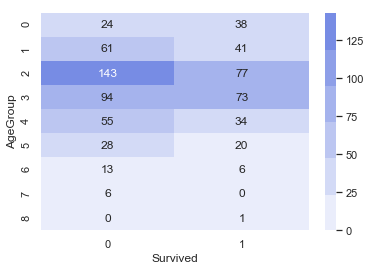

In [250]:
sns.heatmap(ageGroup, annot=True, fmt="d", cmap=sns.light_palette((260, 75, 60), input="husl"))

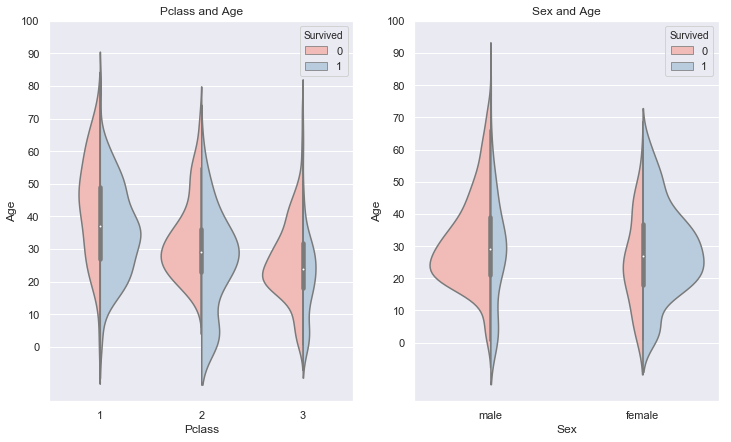

In [256]:
fig, axes = plt.subplots(1,2,figsize=(12,7))
sns.violinplot("Pclass","Age", hue="Survived", data=titanic, scale="count", split=True, ax=axes[0])
axes[0].set_title("Pclass and Age")
axes[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=titanic, scale="count", split=True,ax=axes[1])
axes[1].set_title("Sex and Age")
axes[1].set_yticks(range(0,110,10))